In [1]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [2]:
import orchest

In [3]:
# Retrieve the data from the previous step.
data = orchest.get_inputs()
train, test = data["data"]

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [5]:
# Get the parameters of the current step and the pipeline.
feature_reduction = bool(orchest.get_step_param("feature_reduction"))
KMeans_Featurizer = bool(orchest.get_step_param("KMeans_Featurizer")) 
Boosting_Flag = bool(orchest.get_step_param("Boosting_Flag")) 
Binning_Flag = bool(orchest.get_step_param("Binning_Flag")) 
Add_Poly = bool(orchest.get_step_param("Add_Poly"))
Stacking_Flag = bool(orchest.get_step_param("Stacking_Flag"))
Imbalanced_Flag = bool(orchest.get_step_param("Imbalanced_Flag"))

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (891, 12)
    Training Set Memory Usage = 0.08 MB
Test Set Shape = (418, 11)
    Test Set Memory Usage = 0.04 MB
Single_Label Target: ['Survived']
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:     549  ->   61.6%
           1:     342  ->   38.4%
    Target Survived is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...


    11 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-information variables
        ['PassengerId', 'Name']

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
Filling missing values with "missing" placeholder and adding a column for missing_flags
    Columns with most missing values: ['Cabin', 'Age', 'Embarked']
    and their missing value totals: [687, 177, 2]


Completed missing value Imputation. No more missing values in train.
    3 new missing value columns added: ['Age_Missing_Flag', 'Cabin_Missing_Flag', 'Embarked_Missing_Flag']
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Values for Train and Test Data
Binary_Classification problem: hyperparameters are being optimized for balanced_accuracy
########   A D D I N G  P O L Y N O M I A L   &   I N T E R A C T I O N    V A R S  #####
Adding only Interaction Variables. This may result in Overfitting!
Building Inital Model with given variables...
Model Report :
    Number of Variables =  5
    CV Weighted F1 Score : 0.6435 +/- 0.018 | Min = 0.6269 | Max = 0.6664
Successfully transformed x-variables into text-variables after Polynomial transformations
Building Comparison Model with only Poly and Interaction variables...
Model Report :
    Number of Variables =  10


    CV Weighted F1 Score : 0.5855 +/- 0.02191 | Min = 0.5566 | Max = 0.6126
    Time Taken: 0 (in seconds)
Initially adding 1 variable(s) due to Add_Poly = True setting
    Added variables: ['Age Pclass']
    Intxn and Poly Vars are: ['Age Pclass']


############# R E M O V I N G   H I G H L Y  C O R R E L A T E D    V A R S #################
Removing highly correlated variables using SULA method among (13) numeric variables
    Removing (3) highly correlated variables:
    ['Age', 'Pclass', 'Cabin']
    Following (10) vars selected: ['Fare', 'SibSp', 'Parch', 'Sex', 'Ticket', 'Embarked', 'Age_Missing_Flag', 'Embarked_Missing_Flag', 'Age Pclass', 'Cabin_Missing_Flag']
Splitting features into float and categorical (integer) variables:
    (2) float variables ...
    (8) categorical vars...
############## F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ####################
Current number of predictors = 10 
    Finding Important Features using Boosted Trees algorithm...
        using 10 variables...


        using 8 variables...


        using 6 variables...


        using 4 variables...


        using 2 variables...


Found 9 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  801 , CV rows =  90
Determining which of 2 continuous variables should be Entropy Binned...
    Selected and binned only top 2 continuous variables.
    ['Age Pclass_bin', 'Fare_bin']
    Adding one Feature named Survived_KMeans_Clusters based on KMeans_Featurizer_Flag=True...


    Used KMeans to naturally cluster Train predictor variables into 3 clusters
Alert! Stacking can produce Highly Overfit models on Training Data...


    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and validation data
############### XGBoost M O D E L   B U I L D I N G  B E G I N S  ####################
Rows in Train data set = 801
  Features in Train data set = 12
    Rows in held-out data set = 90
Finding Best Model and Hyper Parameters for XGBoost model...
    Baseline Accuracy Needed for Model = 61.62%
    CPU Count = 2 in this device
Using XGBoost Model, Estimated Training time = 0.192 mins
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.81072874 1.30456026]
    class_weighted_rows = {0: 494, 1: 400}


Training model now on resampled train data: (894, 12). This will take time...


    Resampled data Training time taken = 2 seconds
########################################################
Resampled model results on Held out Validation data:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       494
           1       0.90      0.86      0.88       307

    accuracy                           0.91       801
   macro avg       0.91      0.90      0.90       801
weighted avg       0.91      0.91      0.91       801

##################  Completed Imbalanced Training using XGBClassifier ################
    Actual training time (in seconds): 2
###########  Single_Label  M O D E L   R E S U L T S #################
Error: Not able to print validation metrics. Continuing...
5-fold Cross Validation  weighted-f1 = 0.0%
No cross validation done when Imbalanced_Flag set to True...
Finding Best Threshold for Highest F1 Score...


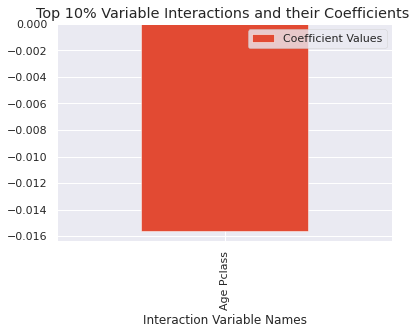

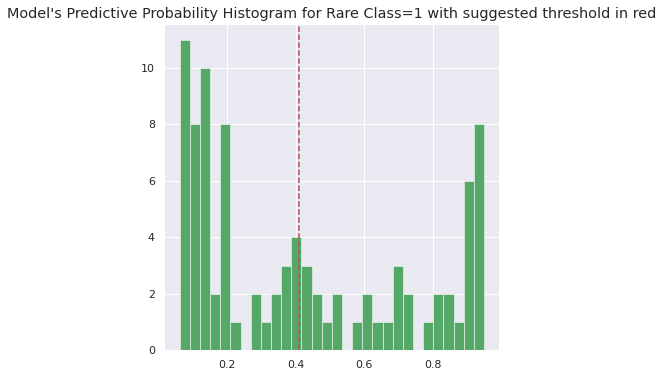

    Using threshold=0.5. However, 0.408 provides better F1=0.76 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 78.9%
Balanced Accuracy = 74.68% with Threshold = 0.50
Confusion Matrix:
[[46  9]
 [12 23]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        55
           1       0.72      0.66      0.69        35

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.76      0.77      0.76        90

Balanced Accuracy = 80.52% with Threshold = 0.41
Confusion Matrix:
[[43 12]
 [ 6 29]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        55
           1       0.71      0.83      0.76        35

    accuracy                           0.80        90
   macro avg       0.79      0.81      0.80        

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 42
Determining which of 2 continuous variables should be Entropy Binned...
    Selected and binned only top 2 continuous variables.
    ['Age Pclass_bin', 'Fare_bin']
Adding one feature named Survived_KMeans_Clusters using KMeans_Featurizer...


    Used KMeans to naturally cluster Train predictor variables into 3 clusters
CAUTION: Stacking can produce Highly Overfit models on Training Data...


    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.81147541 1.30263158]
    class_weighted_rows = {0: 549, 1: 445}


Training model now on resampled train data: (994, 12). This will take time...


    Resampled data Training time taken = 7 seconds
##################  Completed Imbalanced Training using XGBClassifier ################


     Actual Training time taken in seconds = 11
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.408


    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


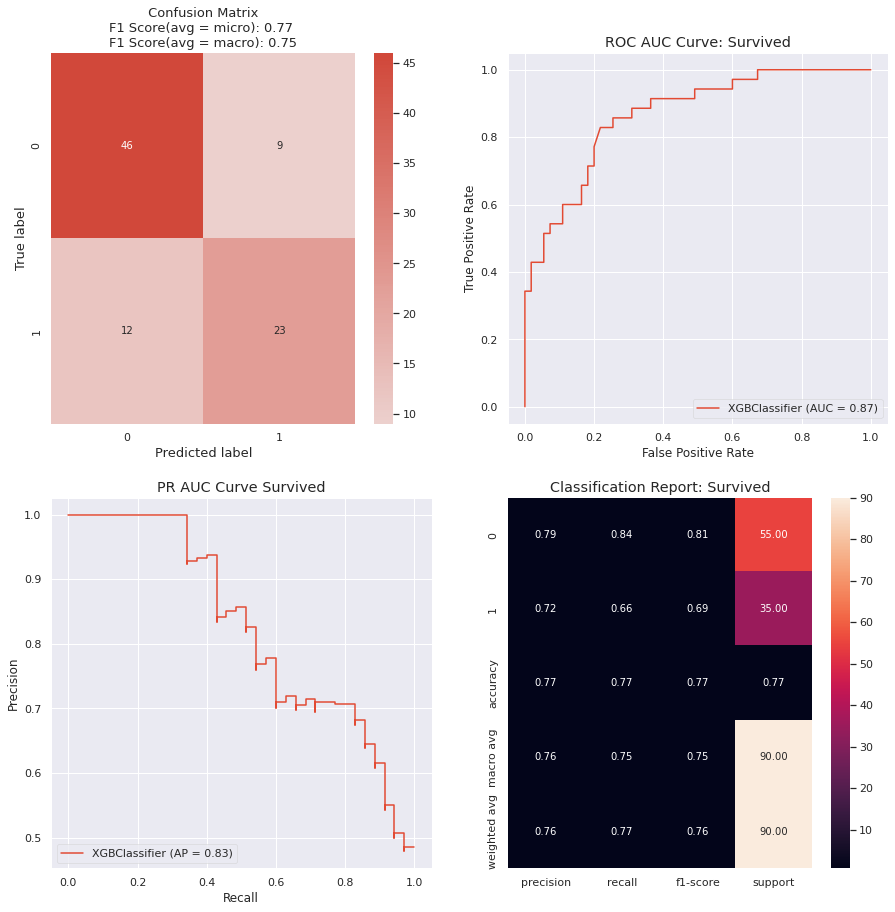

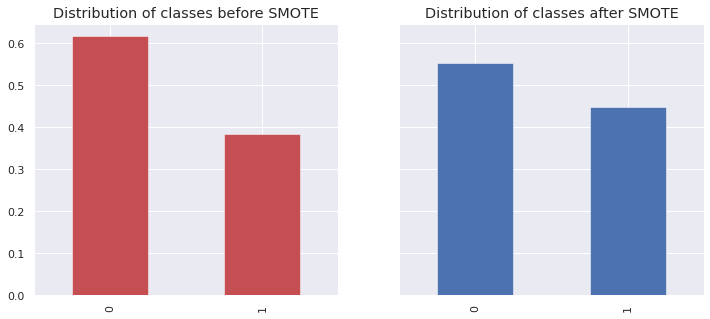

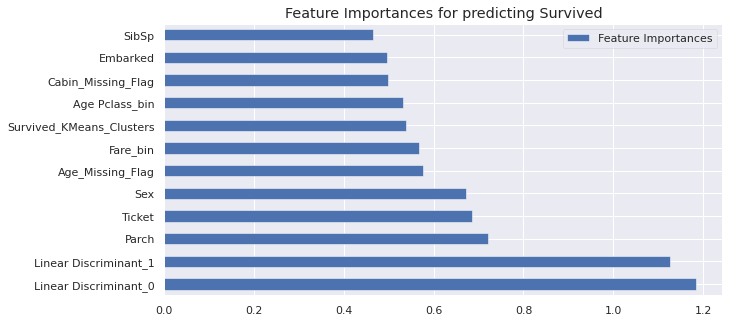

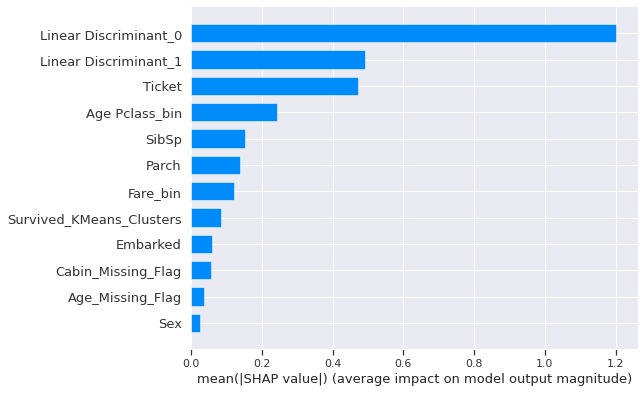

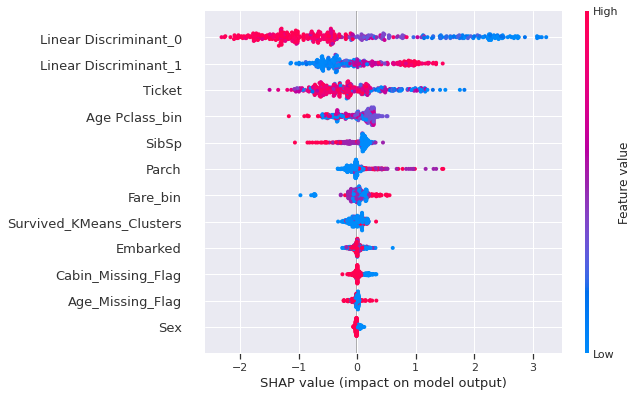

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 78
Writing Output files to disk...
    Saving predictions to ./Survived/Survived_Binary_Classification_test_modified.csv


    Saving predictions to ./Survived/Survived_Binary_Classification_submission.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.3 for the Entire Process


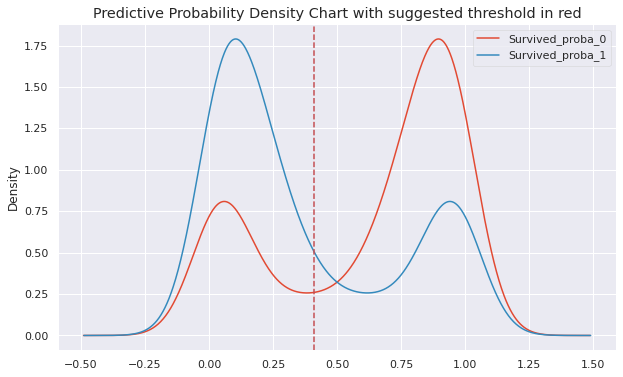

In [6]:
model, features, trainm, testm = Auto_ViML(
    train = train,
    target = "Survived",
    test = test,
    sample_submission = '',
    hyper_param="GS",
    feature_reduction=feature_reduction,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=KMeans_Featurizer,
    Boosting_Flag=Boosting_Flag,
    Binning_Flag=Binning_Flag,
    Add_Poly=Add_Poly,
    Stacking_Flag=Stacking_Flag,
    Imbalanced_Flag=Imbalanced_Flag,
    verbose=3,
)
